## Hipótese: Atrasos afetam os scores das avaliações

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

import plotly.plotly as py
import cufflinks as cf

cf.set_config_file(offline=False, world_readable=True, theme='pearl')

In [6]:
columns = {
    'order_estimated_delivery_date': 'estimated',
    'order_delivered_customer_date': 'delivered',
    'review_score': 'score'
}

data = pd.read_csv("../datasets/olist.csv")
data = data[columns.keys()].rename(columns=columns)

data = data[data['delivered'].notnull()]
data['delivered'] = pd.to_datetime(data['delivered'], format='%Y-%m-%d %H:%M:%S')
data['estimated'] = pd.to_datetime(data['estimated'], format='%Y-%m-%d %H:%M:%S')
data['delay'] = (data['delivered'] - data['estimated']).dt.days
data = data[['delay', 'score']]
data.count()

delay    100783
score    100783
dtype: int64

In [7]:
data.head()

,delay,score
0,-8,4.0
1,-10,4.0
2,-8,5.0
3,-6,3.0
4,-6,4.0


## Distribuição de scores por atraso em dias

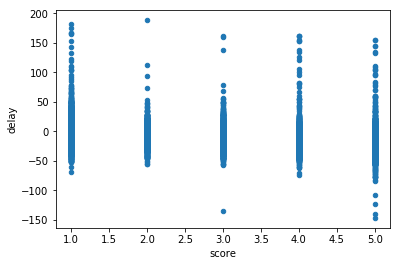

In [9]:
data.plot(x='score', y='delay', kind='scatter')

In [11]:
data.corr()['delay']['score']

-0.24720427989772584